In [ ]:

#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the dataset
df=pd.read_csv("RTA Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
# Printing the top 5 rows
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


# Exploratory Data Analysis

In [ ]:
# print the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

Data synopsis:

- Number of observations: 12316
- Number of columns: 32
Memory Usage: 3.0+ MB
- Number of integer columns: 2
- Number of object columns: 30
- Number of columns with missing values: 16
* Columns with missing values: Educational_level, Vehicle_driver_relation, Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle, Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment, Types_of_Junction, Road_surface_type, Type_of_collision, Vehicle_movement, Work_of_casuality, Fitness_of_casuality

In [ ]:
#Checking the shapes of the dataset
df.shape


(12316, 32)

In [ ]:
# descriptive summary of numeric columns
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
# checking for null values

df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

The method shows us how many missing values there are in each column. “Defect_of_Vehicle” shows the highest number of missing values, which is 4427 out of 12316 instances.

In [ ]:
# check for duplicate columns
print("Number of duplicate rows:", df.duplicated().sum())
print("Unqiue values per column:")
df.nunique()

Number of duplicate rows: 0
Unqiue values per column:


Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [ ]:
#dropping columns which has more than 2500 missing values and Time column
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'], axis = 1, inplace = True)
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)


The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [ ]:
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
#checking the current null values
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

# data visualiazation

In [ ]:

#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

The charts show that the data is imbalanced with respect to the target variable (Accident_severity).The class of accidents with slight injury is the majority class with 84.56% of the instances falling in that category. The class of accidents with serious injury comes next with a proportion of 14.15% .The class of accidents with fatal injury contributes only  1.28% of the entirety of the dataset.

<Axes: >

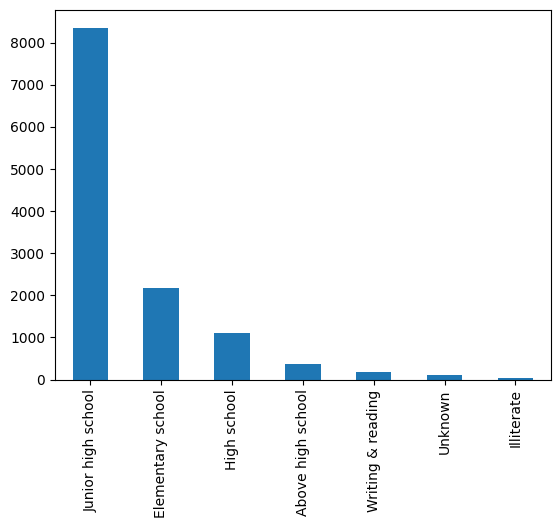

In [ ]:
# Education levels of car drivers
df['Educational_level'].value_counts().plot(kind='bar')

We can see more than 7000 drivers are having education up to junior high school, and only a fraction of drivers have education above high school.

<function matplotlib.pyplot.show(close=None, block=None)>

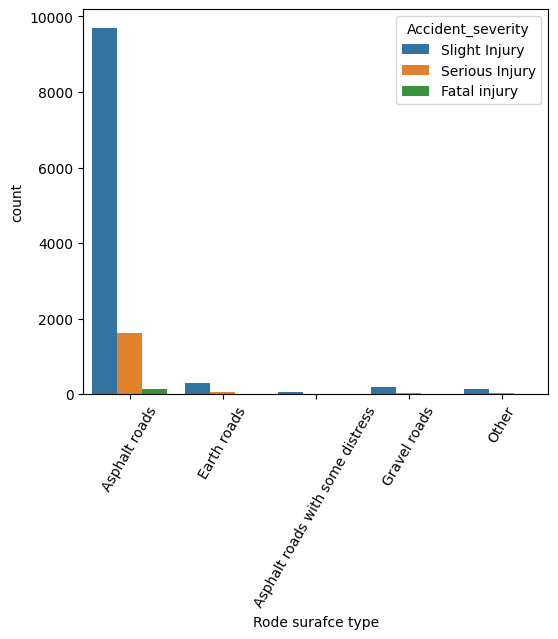

In [ ]:
# plot the bar plot of road_surface_type and accident severity feature
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

We can learn that most accidents happened on “asphalt roads” in our dataset, followed by “earth roads.” Here we can say that most fatal injuries occur on asphalt roads, so they might not be a significant variable to predict the target class.

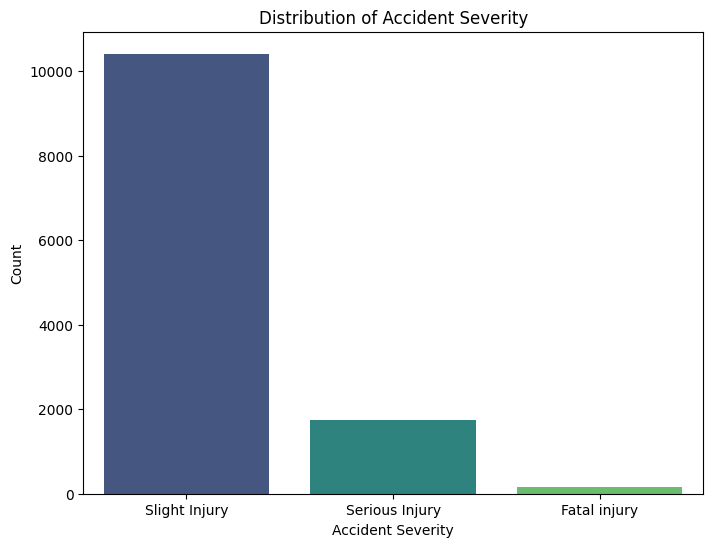

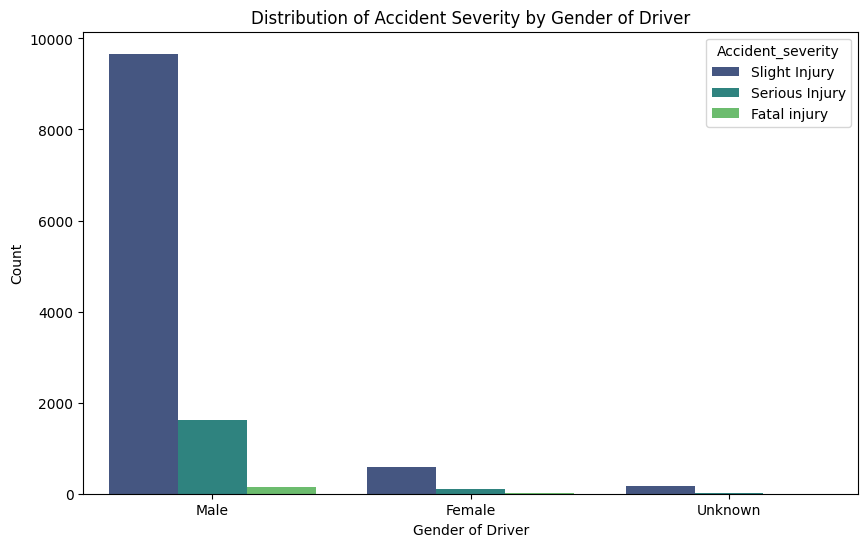

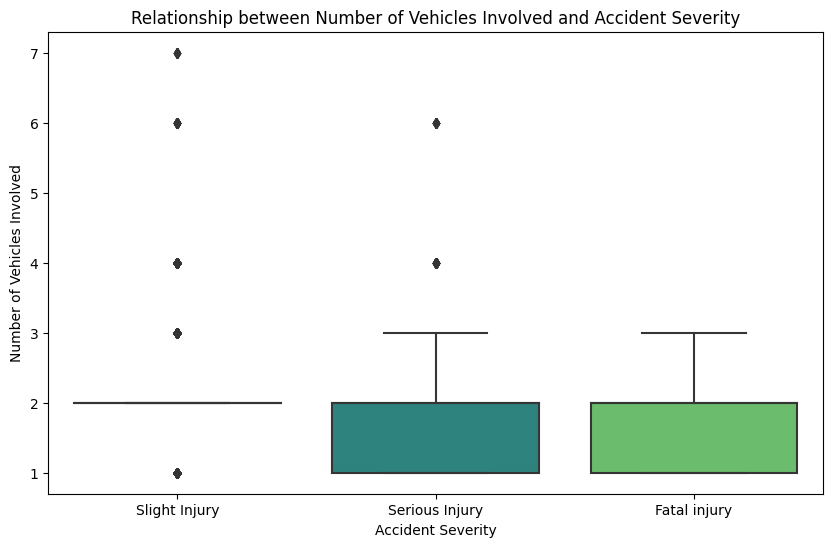

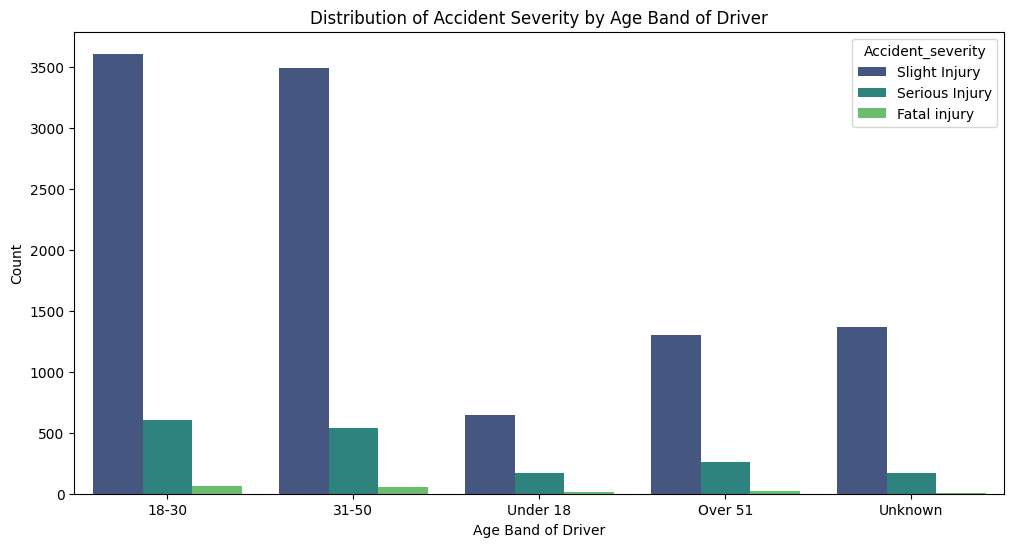

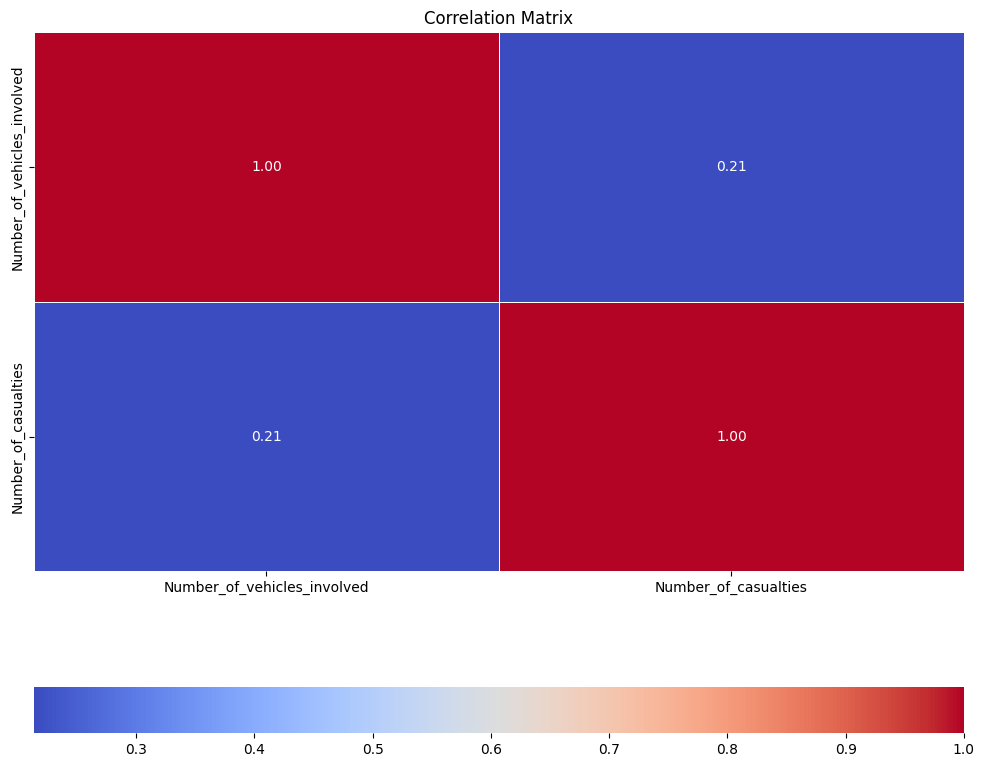

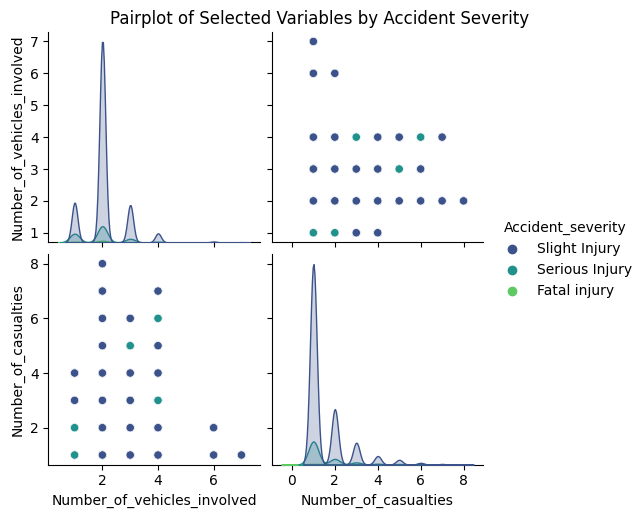

In [ ]:
# Phân phối của mức độ nghiêm trọng tai nạn
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_severity', data=df, palette='viridis')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

# Phân phối theo giới tính của người lái xe
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex_of_driver', data=df, hue='Accident_severity', palette='viridis')
plt.title('Distribution of Accident Severity by Gender of Driver')
plt.xlabel('Gender of Driver')
plt.ylabel('Count')
plt.show()

# Mối quan hệ giữa số lượng phương tiện tham gia tai nạn và mức độ nghiêm trọng
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_severity', y='Number_of_vehicles_involved', data=df, palette='viridis')
plt.title('Relationship between Number of Vehicles Involved and Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Vehicles Involved')
plt.show()

# Phân phối theo độ tuổi của người lái xe
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_band_of_driver', data=df, hue='Accident_severity', palette='viridis')
plt.title('Distribution of Accident Severity by Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.show()

# Heatmap về mức độ tương quan giữa các biến số
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'orientation': 'horizontal'})
plt.title("Correlation Matrix")
plt.show()

# Pairplot để hiển thị mối quan hệ giữa các biến số chọn lọc
selected_columns = ['Accident_severity', 'Number_of_vehicles_involved', 'Number_of_casualties']
sns.pairplot(df[selected_columns], hue='Accident_severity', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Selected Variables by Accident Severity', y=1.02)
plt.show()

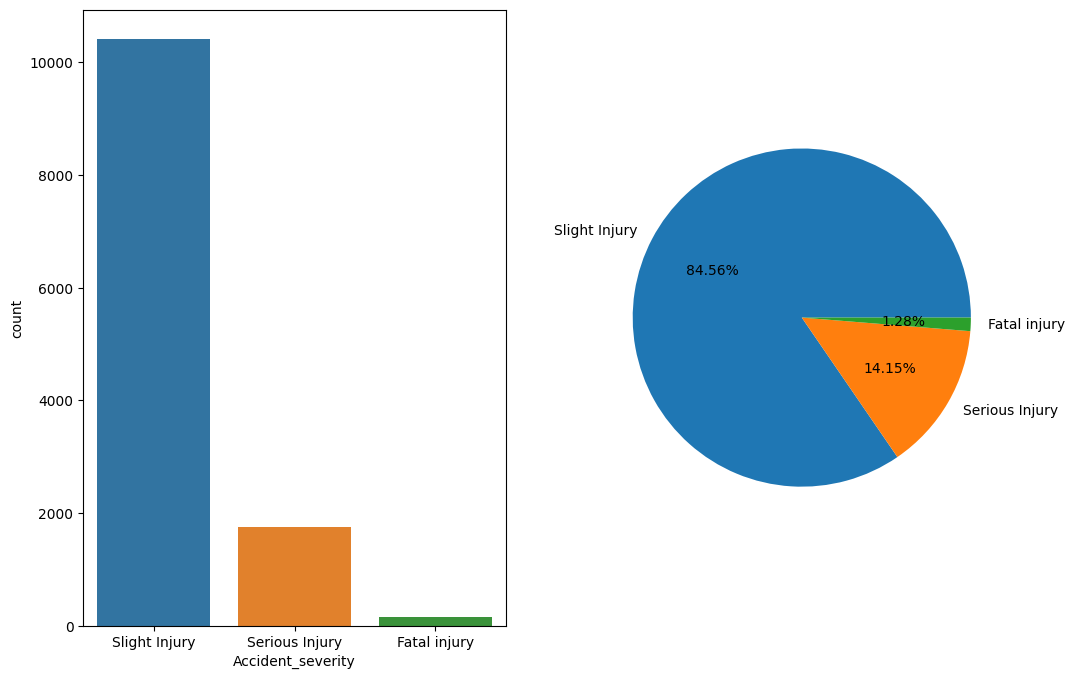

In [ ]:
# checking the target variable - accident severity for class imbalance

plt.figure(figsize=(12,8))

# bar plot

ax1 = plt.subplot(1,2,1)
countplot = sns.countplot(x=df['Accident_severity'])

ax2 = plt.subplot(1,2,2)
plt.pie(x=df['Accident_severity'].value_counts(), labels= list(df['Accident_severity'].unique()), autopct='%1.2f%%')

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Chuyển đổi biến phân loại thành dạng số
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

In [ ]:
# Phân chia dữ liệu
X = df_encoded.drop('Accident_severity', axis=1)  # Đưa ra mục tiêu cần dự đoán
y = df_encoded['Accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

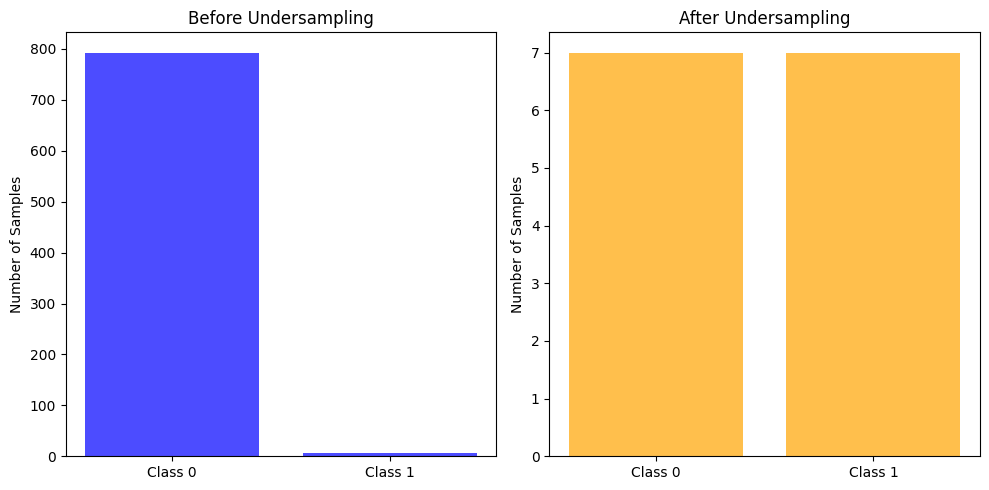

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Tạo dữ liệu mẫu (có thể thay thế bằng dữ liệu thực)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tính số lượng mẫu trước undersampling
value_counts_before = pd.Series(y_train).value_counts()

# Áp dụng Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Tính số lượng mẫu sau undersampling
value_counts_after = pd.Series(y_train_resampled).value_counts()

# Vẽ biểu đồ
labels = ['Class 0', 'Class 1']
indices = np.arange(len(labels))

plt.figure(figsize=(10, 5))

# Biểu đồ trước undersampling
plt.subplot(1, 2, 1)
plt.bar(indices, value_counts_before, color='blue', alpha=0.7)
plt.title('Before Undersampling')
plt.xticks(indices, labels)
plt.ylabel('Number of Samples')

# Biểu đồ sau undersampling
plt.subplot(1, 2, 2)
plt.bar(indices, value_counts_after, color='orange', alpha=0.7)
plt.title('After Undersampling')
plt.xticks(indices, labels)
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()


In [ ]:
# Xử lý mất cân bằng dữ liệu bằng SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

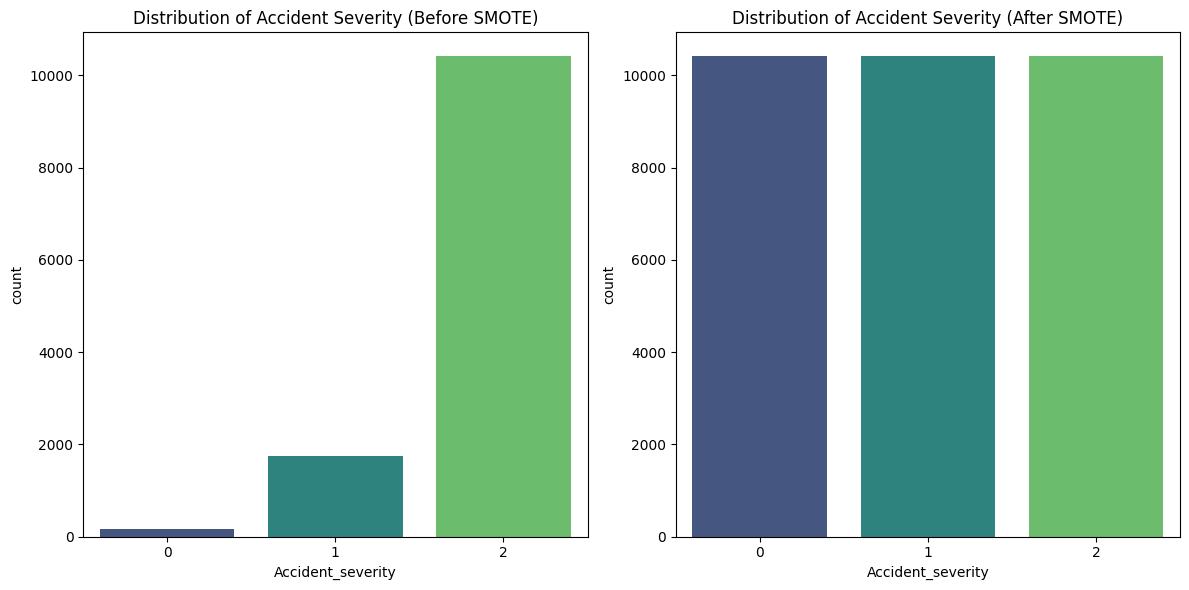

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
# Chuyển đổi biến phân loại thành dạng số
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Phân chia dữ liệu
X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']

# Sử dụng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Tạo DataFrame mới sau khi sử dụng SMOTE
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Accident_severity'] = y_resampled

# Biểu đồ cột so sánh phân phối trước và sau khi sử dụng SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Accident_severity', data=df_encoded, palette='viridis')
plt.title('Distribution of Accident Severity (Before SMOTE)')

plt.subplot(1, 2, 2)
sns.countplot(x='Accident_severity', data=df_resampled, palette='viridis')
plt.title('Distribution of Accident Severity (After SMOTE)')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Trees - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Trees - Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Trees - Accuracy: 0.7568993506493507
Decision Trees - Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.35      0.32        37
           1       0.27      0.31      0.29       363
           2       0.87      0.84      0.86      2064

    accuracy                           0.76      2464
   macro avg       0.48      0.50      0.49      2464
weighted avg       0.77      0.76      0.76      2464



In [ ]:
# Random Forests
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forests - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forests - Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forests - Accuracy: 0.8396915584415584
Random Forests - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.64      0.02      0.05       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.49      0.34      0.32      2464
weighted avg       0.80      0.84      0.77      2464



In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr))

# Support Vector Machines (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Support Vector Machines (SVM) - Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Support Vector Machines (SVM) - Classification Report:\n", classification_report(y_test, y_pred_svm))

Logistic Regression - Accuracy: 0.8376623376623377
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464

Support Vector Machines (SVM) - Accuracy: 0.8376623376623377
Support Vector Machines (SVM) - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464



, Random Forests có vẻ hiệu quả hơn trong ngữ cảnh này. Tuy nhiên, nếu có thể chấp nhận được mức độ hiệu suất hiện tại và yêu cầu mô hình đơn giản hóa, Logistic Regression cũng là một sự lựa chọn. Tiếp tục kiểm tra và tinh chỉnh mô hình có thể giúp cải thiện kết quả.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Tạo mô hình Random Forests
rf_model = RandomForestClassifier(random_state=42)

# Thiết lập các giá trị siêu tham số để thử nghiệm
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tìm kiếm siêu tham số tốt nhất bằng GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In ra siêu tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# Dự đoán trên tập kiểm tra với mô hình tinh chỉnh
y_pred_tuned = grid_search.predict(X_test)

# Đánh giá hiệu suất của mô hình tinh chỉnh
print("Tuned Model - Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Model - Classification Report:\n", classification_report(y_test, y_pred_tuned))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Model - Accuracy: 0.8392857142857143
Tuned Model - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.54      0.02      0.04       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.46      0.34      0.32      2464
weighted avg       0.78      0.84      0.77      2464



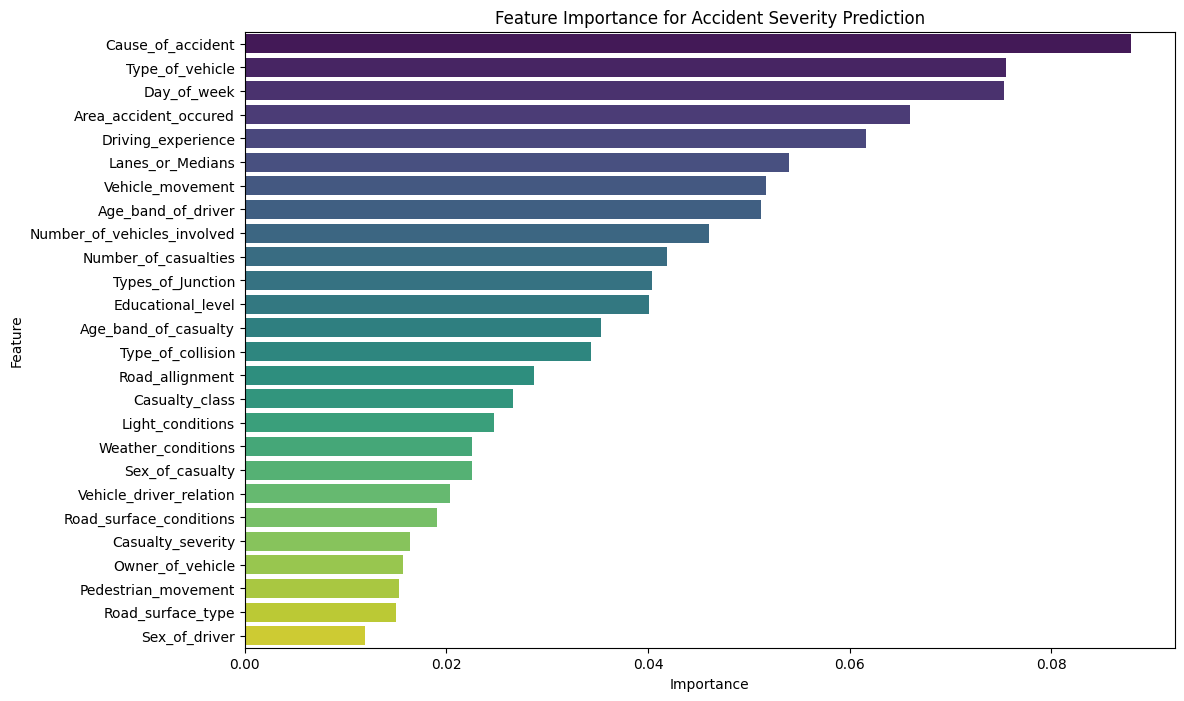

Top 5 Important Features:
25        Cause_of_accident
6           Type_of_vehicle
0               Day_of_week
8     Area_accident_occured
5        Driving_experience
Name: Feature, dtype: object


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



# Chuyển đổi biến phân loại thành dạng số
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Tách biến mục tiêu và biến độc lập
X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']

# Huấn luyện mô hình Random Forests
model = RandomForestClassifier()
model.fit(X, y)

# Lấy đặc trưng quan trọng từ mô hình
feature_importance = model.feature_importances_

# Xây dựng DataFrame để hiển thị đặc trưng và độ quan trọng tương ứng
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ cột cho đặc trưng quan trọng
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Accident Severity Prediction')
plt.show()

# Chọn top k đặc trưng quan trọng
top_k_features = 5
selected_features = feature_importance_df.head(top_k_features)['Feature']

# In ra top k đặc trưng quan trọng
print(f'Top {top_k_features} Important Features:')
print(selected_features)
